# Simple Linear Regression

Linear regression assumes as a linear or straight line relationship between input variable (X) and output variable (Y).

The line of simple linear model is written as:
```
y = b0*x +b1
```
where,<br /> y is output variable,<br />x is input variable,<br />b0,b1 cofficient variable which are need to calculate to fiting the best line in dataset.


In [18]:
# import libraries
import pandas as pd
from math import sqrt
from matplotlib import pyplot as plt
from random import randrange

In [2]:
# read train data
train_data = pd.read_csv("C:/Users/guptambr/ML_Algorithm/datasets/insurance1.csv")
train_data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


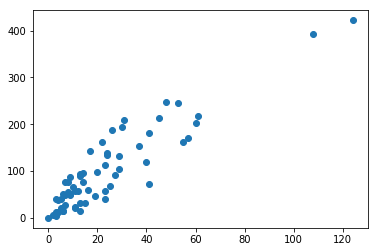

In [71]:
# plot the data
plt.scatter(train_data.X,train_data.Y)
plt.show()

### Steps of Linear Regression

Divided the Linear Regression tutorial in five parts:

1. Calculate Mean and Variance
2. Calculate the Covariance.
3. Estimate the Cofficients
4. Make Prediction
5. Predict target value (Here it's Insurance)

#### 1. Calculate Mean & Variance

**Mean** : Mean is the average of the list<br />
        ```[(sum of list element)/(length of list)]```<br />
**Variance** : Variance is sum of squared difference of each value from the mean of list<br />
        ```step1 : calculate squared difference [(x - mean_of_list)**2 for each x of the list]```<br />
        ```step2 : sum of squared difference of all element of list which calculated in step1```
        

In [4]:
# Estimate Mean and Variance

# Calculate the Mean value of list of a number
def mean(lst_values):
    return sum(lst_values) / float(len(lst_values))

# Calculate the Variance of list of number
def variance(lst_values,mean):
    return sum([(x-mean)**2 for x in lst_values])

# To test mean and variance function used dummy dataset
data = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [r[0] for r in data]
y = [r[1] for r in data]

# find mean of x and y
mean_x = mean(x)
mean_y = mean(y)

variance_x = variance(x,mean_x)
variance_y = variance(y,mean_y)
print ("x stats : mean=%.3f variance=%.3f" %(mean_x,variance_x))
print ("y stats : mean=%.3f variance=%.3f" %(mean_y,variance_y))

x stats : mean=3.000 variance=10.000
y stats : mean=2.800 variance=8.800


#### 2. Calculate Covariance 

**Covariance:** Covariance of two groups of number how those numbers change together.<br />
Covariance is a genralization of correlation. Correlation describe the relationship between two groups of number, where as covariance describe the the relationship between two or more group of number.<br />
```covariance = sum((x_element - mean(x_group)) * (y_element - mean(y_group)))```

In [5]:
# Calculate the covariance between x and y
def covariance(x,mean_x,y,mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

# test the covariance function
data = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in data]
y = [row[1] for row in data]

mean_x = mean(x)
mean_y = mean(y)
covari = covariance(x,mean_x,y,mean_y)
print ("covariance: %.3f"% (covari))

covariance: 8.000


#### 3. Estimate the coefficients

There are two coefficient need to be calculate b0 and b1.<br />
Linear regression equation is : ```y = b0*x + b1```<br />
Estimation of b0 : ```b0 = covariance(x,y)/variance(x)```<br />
Estimation of b1 : ```b1 = mean(y) - b0 * mean(x)```

In [88]:
# Calculate the cofficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    mean_x,mean_y = mean(x),mean(y)
    b0 = covariance(x,mean_x,y,mean_y) / variance(x,mean_x)
    b1 = mean_y- b0 * mean_x
    return b1,b0
# validate the cofficient function
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b1, b0 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.800, B1=0.400


#### 4. Make Predictions

Linear Regression equation : ```y = b0*x + b1```

In [89]:
# First split the train data into training set and validation set
def train_valid_split(dataset,split):
    train = []
    train_size = split * len(dataset)
    valid_set = list(dataset)
    print (len(valid_set))
    while len(train) <= train_size:
        index = randrange(len(valid_set))
        train.append(valid_set.pop(index))
    return train,valid_set    

In [90]:
# simple linear regression to predict the target value
def simple_linear_regression(train,test):
    prediction = []
    b1,b0 = coefficients(train)
    #print (b1,b0)
    X = [row[0] for row in train]
    Y = [row[1] for row in train]
    y = [b0*row[0] + b1 for row in train]
    plt.scatter(X,Y)
    plt.plot(X,y)
    plt.show()
    for row in test:
        yhat = b0*row[0] + b1
        prediction.append(yhat)
    return prediction


In [91]:
# To check the performance of the model used root square mean error
def root_square_mean_error(actual,predicted):
    sum_err = 0.0
    for i in range(len(actual)):
        predict_err = predicted[i] - actual[i]
        sum_err += ((predict_err) ** 2)
    mean_sqr_err = (sum_err)/len(actual)
    return sqrt(mean_sqr_err)
        

In [92]:
# Evaluate the regression algorithm on training dataset
def evaluate_algo(dataset,algorithm,split):
    train,valid = train_valid_split(dataset,split)
    valid_set = []
    for row in valid:
        row_copy = list(row)
        row_copy[-1] = None
        valid_set.append(row_copy)
    print (valid_set)
    predicted = algorithm(train,valid_set)
    actual = [row[-1] for row in valid]
    #print (len(predicted),len(actual))
    rsme = root_square_mean_error(actual,predicted)
    return rsme

63
[[108.0, None], [23.0, None], [10.0, None], [48.0, None], [11.0, None], [7.0, None], [24.0, None], [3.0, None], [9.0, None], [9.0, None], [29.0, None], [7.0, None], [25.0, None], [5.0, None], [22.0, None], [61.0, None], [12.0, None], [13.0, None], [27.0, None], [3.0, None], [15.0, None], [29.0, None], [24.0, None], [31.0, None], [14.0, None]]


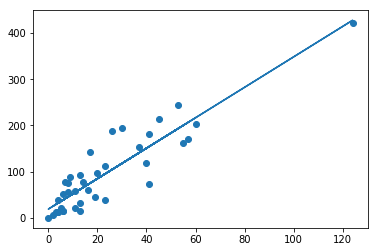

34.32783837241274


In [99]:
# load dataset
train_data = pd.read_csv("C:/Users/guptambr/ML_Algorithm/datasets/insurance1.csv")
split = 0.6
dataset = list(map(list, train_data.values))
rsme = evaluate_algo(dataset,simple_linear_regression,split)
print (rsme)